<a href="https://colab.research.google.com/github/CHRISTIANDAGATTI/AyVD---Grupo-9/blob/main/CENTRAL_Entregable_PARTE_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>




**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Edición 2022**

---

# Trabajo práctico entregable - Parte 2

In [14]:
import io
import matplotlib
import matplotlib.pyplot as plt
import numpy
import pandas as pd
import seaborn as sns
from scipy import stats

sns.set_context('talk')

## Lectura del dataset

En la notebook 00 se explican los detalles de la siguiente sección.

In [15]:
url = 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/sysarmy_survey_2020_processed.csv'
df = pd.read_csv(url)

In [16]:
df[:3]

,profile_gender,profile_age,work_country,work_province,profile_years_experience,work_years_in_company,work_years_in_current_position,work_people_in_charge_of,profile_studies_level,profile_studies_level_state,...,work_has_violence_situations,profile_sexual_orientation,profile_has_disabilities,profile_has_disabilities_hiring_difficulties,company_employee_number,company_main_activity,company_recommended,company_diversity_policies,company_extra_benefits,company_best_companies_city
0,Mujer,26,Argentina,Ciudad Autónoma de Buenos Aires,3.0,3.0,3.0,0,Universitario,En curso,...,En mi trabajo actual,Homosexual,NaN,NaN,501-1000,Servicios / Consultoría de Software / Digital,7,2,"Capacitaciones y/o cursos, Comidas pagas / sub...",NaN
1,Hombre,29,Argentina,Corrientes,5.0,2.0,2.0,4,Universitario,En curso,...,Jamás,Heterosexual,Visual,No,201-500,Otras industrias,8,9,"Horarios flexibles, Stock options / RSUs, Viát...",NaN
2,Mujer,22,Argentina,Ciudad Autónoma de Buenos Aires,2.0,0.0,0.0,0,Secundario,Completado,...,En un trabajo anterior,Bisexual o queer,NaN,No,2001-5000,Otras industrias,6,9,"Clases de gimnasia online, Comidas pagas / sub...",NaN


In [17]:
df[['profile_gender', 'salary_monthly_NETO']].groupby('profile_gender').describe()

salary_monthly_NETO                                     \
                             count          mean            std   min   
profile_gender                                                          
Hombre                      4944.0  98836.063558  102159.664237   1.0   
Mujer                        908.0  73501.414465   56256.880181   2.0   
Otros                         31.0  95441.354839   88635.674358  40.0   

                                                       
                    25%      50%       75%        max  
profile_gender                                         
Hombre          53285.0  80000.0  110000.0  2080000.0  
Mujer           43818.0  65000.0   92000.0   800000.0  
Otros           39500.0  74000.0  117500.0   380000.0

In [18]:
df[df.salary_monthly_NETO > 1000]\
  [['profile_gender', 'salary_monthly_NETO']].groupby('profile_gender').describe()

salary_monthly_NETO                                         \
                             count           mean            std      min   
profile_gender                                                              
Hombre                      4815.0  101481.624343  102215.304684   1100.0   
Mujer                        863.0   77328.913778   55082.760570   2000.0   
Otros                         28.0  105660.714286   87235.710235  34000.0   

                                                       
                    25%      50%       75%        max  
profile_gender                                         
Hombre          55000.0  80000.0  110000.0  2080000.0  
Mujer           47850.0  67200.0   93000.0   800000.0  
Otros           43750.0  78900.0  122750.0   380000.0

In [19]:
alpha = 0.05

In [20]:
is_man = df.profile_gender == 'Hombre'

groupA = df[(df.salary_monthly_NETO > 1000) & is_man].salary_monthly_NETO
groupB = df[(df.salary_monthly_NETO > 1000) & ~is_man].salary_monthly_NETO

nA=len(groupA)
print('nA:', nA)

nB=len(groupB)
print('nB:', nB)


nA: 4815
nB: 891


## Ejercicio 1: Estimación

**Consigna:**  Calcular una estimación puntual y un intervalo de confianza de nivel (1-alpha) para la resta entre la media del salario Neto para Hombres menos la media del salario Neto para otros géneros(diferencia de las medias entre el grupoA y grupoB). 
¿Cómo se relaciona este intervalo de confianza con el test de hipótesis?

In [21]:
#estimacion de media e intervalos de confianza para Hombres
alpha = 0.05
z_0975 = 1.96
media=groupA.mean()
std=groupA.std()
estadistico_liminf =media-(std*z_0975/numpy.sqrt(nA))
estadistico_limsup =media+(std*z_0975/numpy.sqrt(nA))
print("liminf=", estadistico_liminf,"limsup=", estadistico_limsup)
print("Dif=", estadistico_limsup-estadistico_liminf)
print("media=", media)
print("std=",std)

liminf= 98594.4443923896 limsup= 104368.80429296875
Dif= 5774.3599005791475
media= 101481.62434267918
std= 102215.30468444877


In [22]:
#estimacion de media e intervalos de confianza para NO Hombres
alpha = 0.05
z_0975 = 1.96
mediaB=groupB.mean()
stdB=groupB.std()
estadistico_liminfB =mediaB-(stdB*z_0975/numpy.sqrt(nB))
estadistico_limsupB =mediaB+(stdB*z_0975/numpy.sqrt(nB))
print("liminf=", estadistico_liminfB,"limsup=", estadistico_limsupB)
print("Dif=", estadistico_limsupB-estadistico_liminfB)
print("media=", mediaB)
print("std=",stdB)

liminf= 74508.31492410542 limsup= 81930.18696141648
Dif= 7421.8720373110555
media= 78219.25094276095
std= 56515.32732350074


In [23]:
#estimacion de media e intervalos de confianza para la Diferencia entre las medias
alpha = 0.05
z_0975 = 1.96
difmedias=groupA.mean() - groupB.mean()
estadistico_liminfDif =difmedias-z_0975*numpy.sqrt(std**2/nA+stdB**2/nB)
estadistico_limsupDif =difmedias+z_0975*numpy.sqrt(std**2/nA+stdB**2/nB)
print("liminf=", estadistico_liminfDif,"limsup=", estadistico_limsupDif)
print("Dif=", estadistico_limsupDif-estadistico_liminfDif)
print("media=", difmedias)

liminf= 18560.5807418027 limsup= 27964.16605803376
Dif= 9403.58531623106
media= 23262.37339991823


**¿Cómo se relaciona este intervalo de confianza con el test de hipótesis?**

El t-test, también conocido como prueba t de Student, es un test estadístico empleado para analizar si dos muestras proceden de poblaciones con la misma media. Para ello, cuantifica la diferencia entre la media de las dos muestras y, teniendo en cuenta la varianza de estas, estima cómo de probable es obtener una diferencia igual o mayor que la observada si la hipótesis nula de que las medias poblacionales son iguales fuese cierta. A la probabilidad estimada por el test se le conoce como p-value.

Un p-value mayor que un determinado límite, por ejemplo 5% o 1%, indica que la diferencia observada puede deberse al azar, por lo que no se rechaza la hipótesis nula. Por el contrario, cuando el p-value es menor que el límite seleccionado, se considera que existen evidencias suficientes para rechazar que las muestras proceden de poblaciones con misma media.

Cuando se dispone de dos muestras, el hecho de que sus valores promedio no sean exactamente iguales no implica que haya evidencias de una diferencia real. Dado que cada muestra tiene su propia variabilidad debida al muestreo aleatorio, aunque procedan de la misma población, las medias muestrales no tienen por qué ser iguales. Es aquí donde el t-test aporta valor. Es un test estadístico para comparar la media entre dos muestras.

El estadístico t sigue una distribución conocida como distribución t de Student. Esta distribución se asemeja en gran medida a la distribución normal, tiene como parámetros la media, la varianza y además, a través de los grados de libertad, permite flexibilizar las colas en función del tamaño que tenga la muestra.

El proceso a seguir para calcular intervalos de confianza o test de hipótesis es el mismo que el seguido en el modelo Normal. La única diferencia es que, en lugar de emplear Z-scores (cuantiles de la distribución normal), se emplean los T-scores (cuantiles de la distribución t-student).

## Ejercicio 2: Test de hipótesis



### 2.1 Formalización

Describir formalmente los distintos componentes de un test de hipótesis para comprobar si la distribución de los salarios es distinta entre los grupos A y B.

**Hipótesis Nula**

$H_0=...$

**Estadístico (Pivote)**
  * Identificar el estadístico
  * Escribir qué distribución tiene bajo $H_0$


----------------------------------------------------------------------------
**Respuesta:**

Hipótesis Nula

**H0**= No hay diferencia en las medias de los salarios entre el grupo A y el B (***μ1=μ2***)

Hipótesis alternativa

**Ha**=Existen diferencias en las medias de los salarios entre los grupos A y B (***μ1≠μ2***)

-El estadisitico a calcular es la diferencia entre las medias
-Dado que la Ha es ***μ1=μ2***, se empleará un test de dos colas, en el que seanalizan posibles desviaciones en las dos direcciones

### 2.2 P-valor

1. Calcule el p-valor y decida si rechazar o no la hipótesis nula.
2. Interprete el resultado.

Links útiles:
* [Test de hipótesis usando scipy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html)
* [Test de Welch](http://daniellakens.blogspot.com/2015/01/always-use-welchs-t-test-instead-of.html)

In [24]:
#Test de Levene
#Se considera hipótesis nula que los datos proceden de distribuciones con la misma varianza (homocedasticidad). 
#Por lo tanto, si el p-value es menor que un determinado valor (típicamente 0.05), entonces se considera que hay evidencias suficientes para rechazar la homocedasticidad en favor de la heterocedasticidad.
levene_test = stats.levene(groupA, groupB, center='median')
levene_test

#En este caso hay heterogeneidad de varianza, por lo que es necesario hacer el test de Welch para prueba de hipotesis

LeveneResult(statistic=23.431491665834244, pvalue=1.3285372646647198e-06)

Test de Welch: Este test debería ser usado en vez de el test t-student dado que  tiene una mejor performance cuando el tamaño de la muestra y las varianzas son distintas entre los grupos y además da el mismo resultado cuando el tamaño de muestra y las varianzas son iguales entre grupos.

Los supuestos que se deben cumplir de este test son:

La variable independiente (género) es categórica con al menos dos niveles (grupos)
La variable dependiente (salario neto) es continua
Las dos poblaciones se distribuyen normal

In [25]:
stats.ttest_ind(groupA, groupB, equal_var = False) #Podemos rechazar la Ho de igualdad de medias

Ttest_indResult(statistic=9.697205976350673, pvalue=8.605197322133209e-22)

#Conclusión:
Se calcula el p-valor: mide la probabilidad de obtener los resultados observados, asumiendo que la hipótesis nula es verdadera. Si esta probabilidad es pequeña (menor que α ) se rechaza H0 y se concluye que la diferencia observada no es atribuible al azar y las medias de las dos poblaciones son diferentes.

Dado que p_valor < α  se rechaza la hipótesis nula

El resultado del test de hipótesis permite afirmar que la distribución de salarios entre los grupos es distinta.

### [Opcional] 2.3 Potencia del test

Nuestra muestra, ¿era lo suficientemente grande para detectar si existe o no una diferencia entre los grupos?

1. Utilice la función `tt_ind_solve_power` para calcular el tamaño necesario de la muestra para un poder estadístico de 0.8, 0.9 y 0.95, asumiendo una significancia estadística de 0.05.
2. ¿Cómo intepretan el poder estadístico de un test? Dado su conocimiento de dominio sobre los datos, ¿les parece que esta muestra es lo suficientemente grande para ser representativo de la tendencia general? ¿y para utilizarlo en un juicio penal contra una empresa XX por una causa de discriminación?

[Documentación](https://www.statsmodels.org/stable/generated/statsmodels.stats.power.tt_ind_solve_power.html)

NOTA: este análisis debería hacerse ANTES de recolectar los datos.

In [26]:
from statsmodels.stats.power import tt_ind_solve_power

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [35]:
effect_size = (groupA.mean() - groupB.mean()) / groupB.std()
# nobs1=None  - What we want to know
alpha = 0.05
ratio = len(groupB) / len(groupA)
power= 0.80
tt_ind_solve_power(effect_size=effect_size, alpha=alpha, power=power, ratio=ratio)

298.3073379956589

In [36]:
power= 0.90
tt_ind_solve_power(effect_size=effect_size, alpha=alpha, power=power, ratio=ratio)

398.79610014029686

In [37]:
power= 0.95
tt_ind_solve_power(effect_size=effect_size, alpha=alpha, power=power, ratio=ratio)

492.8117730249087

In [38]:
power= 0.9999
tt_ind_solve_power(effect_size=effect_size, alpha=alpha, power=power, ratio=ratio)

1220.6871088112841

Conclusión: dados los resultados de los test de potencias podemos afirmar que nuestra muestra era lo suficientemente grande para detectar las diferencias con respecto a los salarios mensuales netos de cada grupo.

La potencia es la probabilidad de que el test rechace correctamente la hipótesis nula, si la H1 es verdadera.


Respecto a poder utilizar el test o no en un juicio penal contra una empresa XX por una causa de discriminación, entendemos que dada la rigurosidad del caso necesitaríamos que la potencia del test sea lo mayor posible y para ello tomar un "n" lo suficientemente grande minimizando el Error tipo II que sería no rechazar Ho cuando es falsa.

## Ejercicio 3: Comunicación y visualización

**Consigna:** Seleccionen un resultado que les parezca relevante a partir de alguno de los ejercicios del entregable. Diseñe e implemente una comunicación en base a este mensaje, en un archivo PDF.

Elija las palabras y visualización más adecuada para que la comunicación sea entendible, efectiva y se dapte a UNA de las siguientes situaciones:

1. Una sección en un artículo de difusión a presentar como parte de una organización sin fines de lucro.
No más de 1 página A4 (o dos si los gráficos son muy grandes).
  1. Ejemplo: Alguna de las secciones [Los ecosistemas de emprendimiento de América Latina y el Caribe frente al COVID-19: Impactos, necesidades y recomendaciones](https://publications.iadb.org/es/los-ecosistemas-de-emprendimiento-de-america-latina-y-el-caribe-frente-al-covid-19-impactos-necesidades-y-recomendaciones), por ejemplo la sección *2.2. Reacciones de los emprendedores*.
  2. Ejemplo: Alguna de las secciones de [The state of gender pay gap in 2021](https://www.payscale.com/data/gender-pay-gap?tk=carousel-ps-rc-job)
  3. Puntos clave: 
    1. Simpleza de los gráficos.
    2. Comunicación en lenguaje simple a personas que no son necesariamente expertos de dominio.
    2. Selección de UNA oración sobre la que se hace énfasis.
    3. No es necesario que mencionen objetivos ni descripciones del conjunto de datos, se supone que eso ya estaría explicado en otras secciones del informe.

2. Una publicación científica o reporte técnico interno. No más de una página A4:
  2. Ejemplo: La sección de resultados de [IZA DP No. 12914: The Impact of a Minimum Wage Change on the Distribution of Wages and Household Income](https://www.iza.org/publications/dp/12914/the-impact-of-a-minimum-wage-change-on-the-distribution-of-wages-and-household-income).
  2. Ejemplo: Alguna de las secciones de [Temporary reduction in daily global CO2 emissions during the COVID-19 forced confinement](https://www.nature.com/articles/s41558-020-0797-x)
  3. Puntos clave:
    3. Nivel de detalle técnico requerido. Es necesario justificar la validez del análisis.
    4. La idea presentada puede ser más compleja. Pueden asumir que la audiencia tiene conocimiento técnico y va a analizar las visualizaciones en detalle. 
    5. Pueden presentar más en detalle las limitaciones del análisis (significancia estadística, etc.)
    2. No es necesario que mencionen objetivos ni descripciones del conjunto de datos, se supone que eso ya estaría explicado en otras secciones del informe.

3. Un tweet (o post de LinkedIn) para la cuenta de su empresa consultora que hace análisis de datos. El objetivo es promocionar un análisis de datos abiertos que van a incluir en su portfolio:
  1. Ejemplo: [Comparación vacunas covid](https://twitter.com/infobeautiful/status/1381577746527236098?s=20)
  2. Ejemplo: [Tweet del BID](https://twitter.com/el_BID/status/1388508583944507396?s=20). Lo valioso de este tweet es que usaron un único número para transmitir un mensaje. Puede ser algo así, o con un gráfico muy simple.
  3. Ejemplo: [Cambio climático](https://twitter.com/UNFCCC/status/1387732156190011394?s=20) Es un muy buen ejemplo, excepto que el gráfico no se lee nada y hay que entrar a la publicación original.
  3. Ejemplo: [¿Cuánto están los programadores en las empresas?](https://www.linkedin.com/posts/denis-rothman-0b034043_tech-career-work-activity-6793861923269054464-gS6y) (No verificamos la veracidad o seriedad de la fuente).
  4. Puntos clave:
    1. Su audiencia no va a mirar la visualización por más de unos segundos, y no tiene conocimiento técnico.
  3. Tienen que incluir además una *breve* descripción de cómo obtuvieron los datos que están presentando, que no entraría en el tweet.


--------------------------------------------------------------------------------
Para este ejercicio decidimos utilizar los resultados obtenidos en base a las diferencias de sueldo entre varones y mujeres programadores. Dado que vimos que segun el test de Welch hay diferencias significativas, decidimos profundizar el resultado para comunicarlo en forma de probabilidad, ya que consideramos que es mas adecuado para comunicar a los publicos no especialistas.

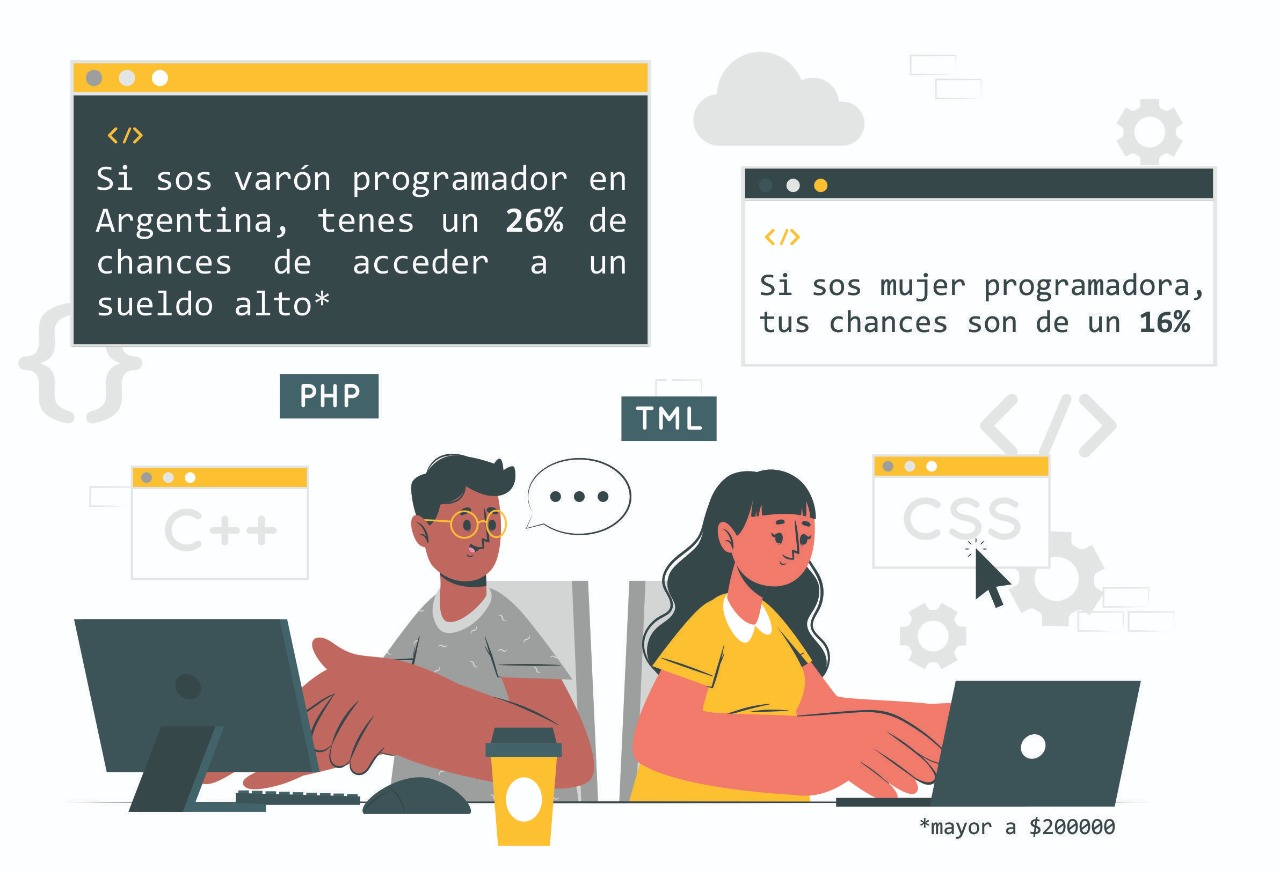